# Classification

*Classification* is a supervised machine learning method where the model attempts to correctly attribute a *label* to a given input data. It learns by looking at examples with labels, and attempting to understand the relation between the label and the *features*, which are the independent variables.

## Table of Contents

* [Logistic Regression](#logistic-regression)
  * [Softmax Regression](#softmax-regression)
* [Naive-Bayes](#naive-bayes)
  * [Gaussian Naïve-Bayes](#gaussian-naive-bayes)
  * [Multinomial Naïve-Bayes](#multinomial-naive-bayes)
  * [Bernoulli Naïve-Bayes](#bernoulli-naive-bayes)
* [Decision Tree](#decision-tree)
* [Random Forest](#random-forest)
* [Support Vector Machine (SVM)](#support-vector-machine)
* [K-Nearest Neighbouts (KNN)](#k-nearest-neighbours)

## Logistic Regression <a id="logistic-regression"></a>

Despite being named *Logistic Regression*, this algorithm is used in the classification task, and is the first model that will be tackled in this chapter. To explain what the Logistic Regression is, it makes sense to define the *Logistic Function*. This function takes as input any real number, for example *t*, and outputs a value between 0 and 1. The inputs of this function are regularly called *logits* and the output corresponds to the probability. The standard logistic regression is then defined as:

$$ \sigma (t) = \frac{e^{t}}{e^{t} + 1} = \frac{1}{1 + e^{-t}}$$

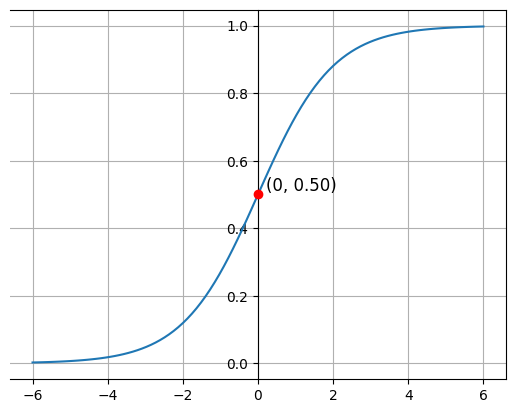

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-6, 6, 100)
sigma = 1 / (1 + np.exp(-t))

y_intercept = 1 / (1 + np.exp(0))

plt.plot(t, sigma)
plt.scatter(0, y_intercept, color="red", zorder=3)
plt.text(0.2, y_intercept, f"(0, {y_intercept:.2f})", fontsize=12, color="black", verticalalignment="bottom")
plt.grid(True)
ax = plt.gca()
ax.spines["left"].set_position("center")
plt.show()

As shown in the code above, this function intercepts the $y$ axis at 0.50. $t$ can be defined by a function, for example, $t = \theta_{0} + \theta_{1}x$, allowing us to rewrite the logistic equation as:

$$ p(x) = \sigma (t) = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x)}} $$

In this context, $p(x)$ corresponds to the probability that an independent variable $y$ belongs to the label one (see label one as the opposite of the label zero, like true and false, respectively) and this equation will be further explained below. However, $t$ does not need to be characterized by two parameters and can be described by a $n$ number of features, so that:

$$
X =
\begin{bmatrix}
    x_{11} & \dots  &  x_{1m} \\
    x_{21} & \dots  &  x_{2m} \\
    \vdots & \ddots & \vdots  \\
    x_{n1} & \dots  &  x_{nm} \\
\end{bmatrix}
$$

Therefore, $Y$ can also be described as:

$$ 
Y =
\left\{
    \begin {aligned}
         & 0 \quad \text{if Class 0}  \\
         & 1 \quad \text{if Class 1}  \\
    \end{aligned}
\right.
$$

The function $t$ can now be rewritten as:

$$
t = \sum_{i=1}^{n} w_{i}x_{i} + b
$$

when $w = [w_{1}, w_{2}, ..., w_{n}]$ is the array that contains the weights of the coefficients and $b$ is the bias of the equation. One can go further and rewrite X as the following, where $w_{0} = b$:
$$
    X =
    \begin{bmatrix}
           1   &    1   &    1    \\
        x_{11} & \dots  &  x_{1m} \\
        x_{21} & \dots  &  x_{2m} \\
        \vdots & \ddots & \vdots  \\
        x_{n1} & \dots  &  x_{nm} \\
    \end{bmatrix} \text{and }
    w = [w_{0}, w_{1}, w_{2}, ..., w_{n}]
$$
Simplifying $t$ to:
$$
    t = w \cdot X
$$

Lastly, consider $P(y=1) = \sigma(t)$ and $P(y=0) = 1 - \sigma(t)$.

Logits is the inverse of the logistic equation expression so that:

$$ \text{logit}p = \sigma^{-1}(p) $$

To find what $\sigma^{-1}(p)$, we must solve the following for $x$:

$$ 
\sigma(x) = p \\
\Leftrightarrow p = \frac{1}{1+e^{-x}} \\
\Leftrightarrow p + pe^{-x} = 1 \\
\Leftrightarrow pe^{-x} = 1 - p \\
\Leftrightarrow e^{-x} = \frac{1 - p}{p} \\
\Leftrightarrow e^{x} = \frac{p}{1 - p} \\
\Leftrightarrow x = ln\left(\frac{p}{1 - p}\right) \\
$$

Then:
$$ \text{logit}p = \sigma^{-1}(p) = ln\left(\frac{p}{1 - p}\right) = t(x) $$

From which we can elaborate:

$$
ln\left(\frac{p}{1 - p}\right) = wX \\
\Leftrightarrow \frac{p}{1 - p} = e^{wX} \\
\Leftrightarrow p = e^{wX}(1 - p) \\
\Leftrightarrow p + pe^{wX} = e^{wX} \\
\Leftrightarrow p (1 + e^{wX}) = e^{wX} \\
\Leftrightarrow p = \frac{e^{wX}}{1 + e^{wX}} \\
\Leftrightarrow p = \frac{1}{1 + e^{-wX}} \\
\Leftrightarrow p(w, X) = \frac{1}{1 + e^{-wX}} \\
$$

The usual measure of a good fit in logistic regression is the logistic loss, also known as the negative log-likelihood. As written above, for a given value $x_{i}$ and $y_{i}$, $p_{i} = p(x_{i})$ corresponds to the probability that the values $x_{i}$ correspond to $y_{i} = 1$. On the contrary, the probability that the same values of $x_{i}$ correspond to $y_{i} = 0$ is $1 - p(x_{i})$. The log loss can be described, for a point $i$, as:

$$
\ell_{i} = 
\left\{
    \begin{aligned}
         & -\text{ln}(p_{i})     \quad & \text{if $y_{1} = 1$}  \\
         & -\text{ln}(1 - p_{i}) \quad & \text{if $y_{1} = 0$}  \\
    \end{aligned}
\right.
$$

One common way to interpret the log loss is as the surprise of the outcome $y_{i}$ for the predicted probability $p_{i}$. Log loss varies from 0 to infinity: it is zero when a perfect prediction is made ($p_{i} - y_{m} = 0$) and tends to infinity in the opposite case ($p_{i} - y_{m} = \pm 1$). The log loss can be combined in one single expression as presented below:

$$
\ell_{i} = -y_{i}\text{ln}(p_{i}) - (1 - y_{i})\text{ln}(1 - p_{i})
$$

The sum of the log loss for for every $i$ value is the overall negative log-likelihood $-\ell$ and the best fit for $w$ is when $-\ell$ is minimized. Alternatively, instead of minimizing the loss, one can maximize its inverse, the log-likelihood:

$$
\ell_{i} = \sum_{i:y_{i}=1} \text{ln}(p_{i}) + \sum_{i:y_{i}=0} \text{ln}(1 - p_{i}) = \sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})
$$

Similarly, it is possible to maximize the likelihood function itself, which corresponds to the probability of the outcome given a set of data, $L$:
$$
L = e^{\sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})} =\\
= \Pi_{i=1}^{n} e^{y_{i}\text{ln}(p_{i})} \cdot e^{(1 - y_{i})\text{ln}(p_{i})} =\\
= \Pi_{i=1}^{n} p_{i}^{y_{i}} \cdot (1 - p_{i})^{1 - y_{i}} \\

\therefore \\

L = \Pi_{i:y_{i}=1}(p_{i}) \Pi_{i:y_{i}=0}(1 - p_{i})
$$

This method is also known as maximum likelihood estimation. 

Unlike Linear Regression, Logistic Regression does not have a closed-form equation that allows us to obtain the best set of $\theta$ values. Fortunately, log-loss is a convex function, which means that with a low enough learning rate and patience, it is guaranteed to reach the global minimum, using Gradient Descent or any other optimization algorithm. Now, let's derive the log-loss to get a grasp of what is necessary to attain the optimal set of $\theta$, including the division by the total number of data points:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1} \left[ y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i}) \right]\\
\Leftrightarrow J(\theta) = \sum_{i=1} \left[ y_{i}\text{ln}(\sigma (\theta^{T} \text{x}^{(i)})) + (1 - y_{i})\text{ln}(1 - \sigma (\theta^{T} \text{x}^{(i)})) \right]\\
$$

Deriving, we get:

$$
\frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left( \frac{\partial}{\partial \theta_{j}} y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) \left( \frac{\partial}{\partial \theta_{j}} (1 - y^{(i)})(\text{ln}(1 - \sigma(\theta^{T}\text{x}))) \right)\\
$$

Let's begin by calculating the derivative of the left part:

$$
\frac{\partial}{\partial \theta_{j}} \left( y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}}} \right) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(1 + e^{-\theta^{T}\text{x}} \right) \right) =\\
= - \frac{1}{e^{-\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{-\theta^{T}\text{x}} + 1)=\\
= x_{j}^{(i)} \frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}=\\
= x_{j}^{(i)} \sigma (-\theta^{T} \text{x})=\\
= x_{j}^{(i)} \frac{1}{1 + e^{\theta^{T}\text{x}}}=\\
= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} - e^{\theta^{T}\text{x}} + 1}{1 + e^{\theta^{T}\text{x}}}=\\
= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}} + 1} - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
= x_{j}^{(i)} \left(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right)=\\
= x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right)
$$

Now the derivative of the right part:
$$
\frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \sigma(\theta^{T}\text{x})) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(1 - \frac{1}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1 - 1 + e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1}{e^{-\theta^{T}\text{x}}} + 1\right) =\\
= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(e^{\theta^{T}\text{x}} + 1\right) =\\
= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{\theta^{T}\text{x}} + 1) \right]=\\
= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times x_{j}^{(i)} e^{\theta^{T}\text{x}} \right]=\\
= - \frac{x_{j}^{(i)} e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
= - x_{j}^{(i)}\sigma{(\theta^{T}\text{x})}
$$

Now plugging in both parts in the equation, we get:

$$
\frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left[ \left( x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right) \right) \left(- x_{j}^{(i)}\sigma{(\theta^{T}\text{x})} \right) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) + y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) = - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) = \frac{1}{m} \sum^{m}_{i=1} \left[ x^{(i)}_{j} (\sigma(\theta^{T}\text{x}) - y^{(i)}) \right]\\
$$

Therefore, the partial derivative of the log-loss function with respect to $\theta$ for a feature $\theta_{j}$ is given by the expression above.

To test the use of Logistic Regression in the classification, we shall use the famous Iris Dataset, that contains only four features (the sepal and pethal length and width) of iris flowers from three different species (Iris-Setosa, Iris-Versicolor, and Iris-Virginica). In this case, we will only consider the petal width as feature and two possible classes: is a Iris-Virginica plant or is not a Iris-Virginica plant.


In [2]:
from sklearn import datasets
iris = datasets.load_iris() 
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

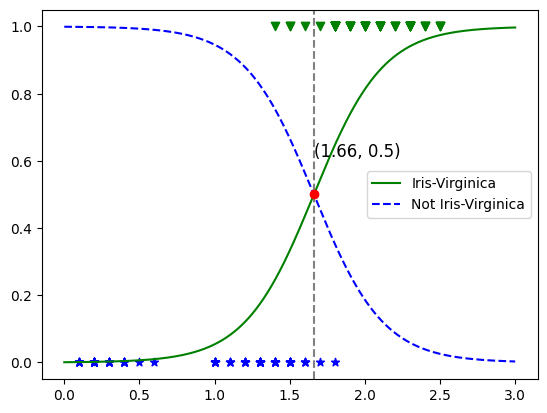

In [4]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 3:] # Gets the petal width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

interception = X_new[y_proba[:, 1] > y_proba[:, 0]][0][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.axvline(interception, ls="--", c="gray")
plt.scatter(interception, 0.5, color="red", zorder=3)
plt.text(interception, 0.6, f"({interception:.2f}, 0.5)", fontsize=12, color="black", verticalalignment="bottom")
plt.scatter(X_zero, y_zero, marker="*", color="blue")
plt.scatter(X_one, y_one, marker="v", color="green")
plt.legend()
plt.show()


In this plot, we tried to represent the curves of probabilities of a petal length belonging to a class. In this case, the threshold length after which the plant is considered Iris-Virginica is 1.66 cm. It is seen in the plot, that some instances of Iris-Virginica have a petal length smaller than that while plants of other species have a petal length above it. In this regeion, the model is unsure of which class the data belongs to, with a confidence around near 50%.

Theta_0 (intercept): -45.27
Theta_1: 5.75
Theta_2: 10.45


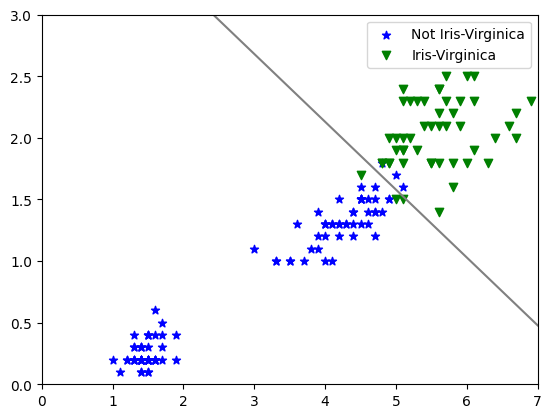

In [5]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 2:]

X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X, y)

theta_0 = log_reg.intercept_[0]
theta_1, theta_2 = log_reg.coef_[0]

# 0 = theta_0 + theta_1 * X_1 + theta_2 * X_2
# - theta_0 + theta_1 * X_1 / theta_2 = X_2

X1_display = np.linspace(0, 7, 1000).reshape(-1, 1)
X2_display = - (theta_0 + theta_1 * X1_display) / theta_2

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

print(f"Theta_0 (intercept): {theta_0:.2f}")
print(f"Theta_1: {theta_1:.2f}")
print(f"Theta_2: {theta_2:.2f}")

plt.axis([0,7, 0,3])
plt.plot(X1_display, X2_display, c="gray")
plt.scatter(X_zero[:,0], X_zero[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_one[:,0], X_one[:,1], marker="v", c="green", label="Iris-Virginica")
plt.legend()
plt.show()

We have seen above the boundary predicted by the model when two features are considered. Let's compare it with a solution done without using Scikit-learn:

In [6]:
import numpy as np

epochs = 100000
learning_rate = 0.01
X = iris["data"][:, 2:]
m = X.shape[1]

X_0 = np.ones(X.shape[0]).reshape(-1, 1)
X_1 = iris["data"][:, 2].reshape(-1, 1) # Gets the petal length and width data
X_2 = iris["data"][:, 3].reshape(-1, 1) # Gets the petal length and width data
X = np.concatenate((X_0, X_1, X_2), axis=-1)
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

theta = np.zeros(X.shape[1])

for epoch in range(epochs):
    y_pred = 1 / (1 + np.exp(- X @ theta))

    d_theta = (1 / m) * (X.T @ (y_pred - y))

    theta = theta - learning_rate * d_theta

print(f"Theta_0 (intercept): {theta[0]:.2f}")
print(f"Theta_1: {theta[1]:.2f}")
print(f"Theta_2: {theta[2]:.2f}")


Theta_0 (intercept): -44.26
Theta_1: 5.60
Theta_2: 10.28


As we see, with enough epochs and a small enough learning rate, the result converged to the same solution as when using the Sklearn function!

### Softmax Regression <a id="softmax-regression"></a>

As you might have noticed, the Logistic Regression can be used in binary classification. When we apply the same principles for a multi-class problem, we call it *Softmax Regression* or *Multinomial Logistic Regression*.

When given an instance **x**, the Softmax Regression model computes a score $s_{k}$(x) for each class $k$. Then applies the softmax function, which estimates the probability of each class (this function is also called *normalized exponential*) to the *s* scores. The scores are calculated using the Linear Regression equation, explained [here](regression.ipynb#linear-regression):

$$ s_{k}(\text{x}) = \theta_{k}^{T} \cdot \text{x}$$

For a determined instance x, we calculate the score of each class and estimate each probability by running the scores in the softmax function, with $K$ being the number of classes, s(x) is the vector that contains the scores for all the K classes, and $\sigma (\text{s}_{k}(x))_{k}$ is the probability that the instance **x** belongs to the class $k$:

$$
\hat{p}_{k} = \sigma (s(x))_{k} = \frac{e^{s_{k}(\text{x})}}{\sum_{j=1}^{K}e^{s_{j}(\text{x})}}
$$

As done in the Logistic Regression, the classifier predicts the class that has the highes probability (the class with highest score).

$$ \hat{y} = \text{argmax}_{k} \sigma (\text{s(x)})_{k} = \text{argmax}_{k} \text{s}_{k}\text{(x)} = \text{argmax}_{k} (\theta^{T} \cdot \text {x})$$

As you may guess, the softmax function only predicts one class at a time, which means that it can only be used in mutually exclusive examples.

Despite the Softmax Regression being a model similar to the Logistic Regression, the loss function is different. In this problem, our model must output a high probability for the correct class and a low probability for the remaining classes. Thus, the loss function attributed to this model penalizes the model when a low probability is attributed to the correct class and is called cross-entropy. This cost function has multiple other use cases since it is used to evaluate how well the estimated probabilities match the target class. Its equation is shown below and $\Theta$ represents the matrix that contains all the $\theta_{k}$ vector:

$$ J(\Theta) = - \frac{1}{m} \sum_{m=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \text{log}(\hat{p}_{k}^{(i)})$$

Notice that if we have $K=2$, we get the log-loss function seen above. To apply Gradient Descent or any other optimization algorithm, we must first find the derivative of the cross-entropy function. Let's start by first deriving the softmax function:

$$
\hat{p}_{k}^{(i)} = \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{k}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = \frac{\partial}{\partial s_{k}^{(i)}(\text{x})} \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
$$

In this situation, we have two derivatives to perform: one when $k = m$ and one when $k \neq m$, where $m$ represents the correct class and $k$ represents the class for which we are calculating the derivative. Starting with $k = m$:

$$
\frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{\partial}{\partial s_{m}^{(i)}(\text{x})} \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{(e^{s_{m}^{(i)}(\text{x})})' \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} \left( \sum^{C}_{j=1}{e^{s_{j}^{(i)}(\text{x})}} \right)'}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{e^{s_{m}^{(i)}(\text{x})} \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} \left[ e^{s_{m}^{(i)} \text{x}} \sum^{C}_{j \neq m: j=1}{e^{s_{j}^{(i)}(\text{x})}} \right]'}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{e^{s_{m}^{(i)}(\text{x})} \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} e^{s_{m}^{(i)} (\text{x})}}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{e^{s_{m}^{(i)}(\text{x})} \left( \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)} (\text{x})}\right)}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} \times \frac{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)} (\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} \times \left( \frac{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} - \frac{e^{s_{m}^{(i)} (\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}\right)\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} = \hat{p}_{m}^{(i)} (1 - \hat{p}_{m}^{(i)})
$$

Now for $k \neq m$:

$$
\frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = \frac{\partial}{\partial s_{m}^{(i)}(\text{x})} \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = \frac{(e^{s_{m}^{(i)} (\text{x})})' \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})}\left(\sum_{j=1}^{C} e^{s_{j}^{(i)} (\text{x})}\right)'}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = \frac{0 \times \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})}\left(e^{s_{k}^{(i)} (\text{x})} + \sum_{j \neq k: j=1}^{C} e^{s_{j}^{(i)}} \right)'}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = - \frac{e^{s_{m}^{(i)}(\text{x})} \times e^{s_{k}^{(i)}(\text{x})}}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = - \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}}} \times \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = - \hat{p}_{k}^{(i)}\hat{p}_{m}^{(i)}
$$

Now, let's procede with the derivative of the log of the probability with respect to $s_{k}$ for the two previous situations. Starting with $k = m$:

$$
\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \hat{p}_{m}^{(i)} (1 - \hat{p}_{m}^{(i)}) = 1 - \hat{p}_{m}^{(i)}
$$

For $k \neq m$:

$$
\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \left( - \hat{p}_{k}^{(i)}\hat{p}_{m}^{(i)} \right) = -\hat{p}_{k}^{(i)} 
$$

Now, we can finally infer that, for an array of values $\theta$:

$$
\frac{\partial J}{\partial \theta_{k}} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial \theta_{k}} \right) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} \times \frac{\partial s_{k}^{(i)}}{\partial \theta_{k}} \right) = \\
= -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} \times \frac{\partial \theta_{k}^{T}\text{x}^{(i)}}{\partial \theta_{k}} \right) = 
-\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} 
\left\{
    \begin{aligned}
         & (1 - \hat{p}_{m}^{(i)})     \quad & \text{if $k = m$}    \\
         & - \hat{p}_{k}^{(i)}         \quad & \text{if $k \neq m$} \\
    \end{aligned}
\right. \text{x}^{(i)} =\\
= \frac{1}{m} \sum_{i=1}^{m} - \left[ y_{k}^{(i)}(1 - \hat{p}_{k}^{(i)}) + \sum_{m \neq k: m=1}^{C} y_{m}^{(i)}(-\hat{p}_{k}^{(i)}) \right] \text{x}^{(i)} = \frac{1}{m} \sum_{i=1}^{m} - y_{k}^{(i)}(1 - \hat{p}_{k}^{(i)}) \text{x}^{(i)} = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_{k}^{(i)} - y_{k}^{(i)}) \text{x}^{(i)}
$$

From this, we can write the following expression, which corresponds to the vector gradient of the cross entropy for class $k$:

$$ \nabla_{\theta_{k}} J(\Theta) = \boxed{\frac{1}{m} \sum_{i=1}^{m} (\hat{p}_{k}^{(i)} - y_{k}^{(i)}) \text{x}^{(i)}} $$

From this equation, we can now calculate the gradient vector for every class and then apply an optimization algorithm to find the parameter matrix $\Theta$ that minimizes the cost function. In the following code, we will present an implementation of the Softmax Regression. In Scikit-learn, the ``LogisticRegression()`` function can be applied to multi-class classification by applying a one-versus-all approach (for every class, calculates the probability of belonging to it or not, a binary task). However, by changing the ``multi_class`` argument to "multinomial", the function switches to a Softmax Regression.


In [28]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 2:]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)
softmax_reg.fit(X, y)

for class_num in range(X.shape[1] + 1):
    theta_0 = softmax_reg.intercept_[class_num]
    theta_1, theta_2 = softmax_reg.coef_[class_num]

    print(f"Class {class_num}")
    print(f"Theta_0 (intercept): {theta_0:.2f}")
    print(f"Theta_1: {theta_1:.2f}")
    print(f"Theta_2: {theta_2:.2f}")

Class 0
Theta_0 (intercept): 41.12
Theta_1: -8.35
Theta_2: -17.97
Class 1
Theta_0 (intercept): 2.08
Theta_1: 1.30
Theta_2: 3.76
Class 2
Theta_0 (intercept): -43.20
Theta_1: 7.05
Theta_2: 14.21


Let's now try and implement, manually, the function using only NumPy and see if the values obtained are similar:

In [8]:
import numpy as np

epochs = 2000000
lr = 0.3

X = iris["data"][:, 2:]
y = iris["target"]
m = X.shape[0]

X = np.c_[np.ones(X.shape[0]), X]

# One-hot encode the data
Y = np.zeros((m, len(np.unique(y))))
Y[np.arange(m), y] = 1

theta = np.zeros((X.shape[1], len(np.unique(y))))

for epoch in range(epochs):
    score = X @ theta
    prob = np.exp(score) / np.sum(np.exp(score), axis=1, keepdims=True)
    grad_theta = (1/m) * X.T @ (prob - Y) 
    theta = theta - grad_theta * lr

for class_num in range(X.shape[1]):
    theta_0 = theta[0][class_num]
    theta_1, theta_2 = theta[1][class_num], theta[2][class_num]

    print(f"Class {class_num}")
    print(f"Theta_0 (intercept): {theta_0:.2f}")
    print(f"Theta_1: {theta_1:.2f}")
    print(f"Theta_2: {theta_2:.2f}")

Class 0
Theta_0 (intercept): 32.56
Theta_1: -6.68
Theta_2: -11.16
Class 1
Theta_0 (intercept): 6.33
Theta_1: 0.47
Theta_2: 0.36
Class 2
Theta_0 (intercept): -38.89
Theta_1: 6.21
Theta_2: 10.80


Our implementation with Gradient Descent is obviously not as optimized as the one in Scikit-learn, such as, for example, the solver utilized. However, with our much slower method, a large number of epochs and an agressive learning rate come close to the parameters attained in Scikit-learn.  

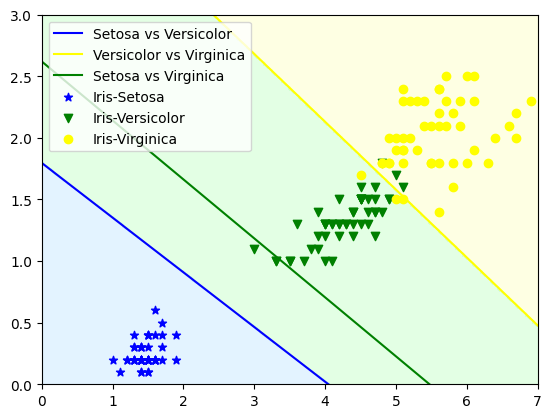

In [47]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X = iris["data"][:, 2:]

X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data
y = iris["target"].astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)
softmax_reg.fit(X, y)

theta_setosa_0 = softmax_reg.intercept_[0]
theta_setosa_1, theta_setosa_2 = softmax_reg.coef_[0]
theta_versicolor_0 = softmax_reg.intercept_[1]
theta_versicolor_1, theta_versicolor_2 = softmax_reg.coef_[1]
theta_virginica_0 = softmax_reg.intercept_[2]
theta_virginica_1, theta_virginica_2 = softmax_reg.coef_[2]

X1_display = np.linspace(0, 7, 1000).reshape(-1, 1)

# Each class boundary is defined as the points where the probability of a class belong to the two classes considered is equal. It can be solved as follows:
# P_setosa = P_versicolor
# \theta_setosa @ X = \theta_versicolor @ X
# \theta_setosa_0 + \theta_setosa_1 @ X_1 + \theta_setosa_2 @ X_2 = \theta_versicolor_0 + \theta_versicolor_1 @ X_1 + \theta_versicolor_2 @ X_2
# X_2 = ((\theta_setosa_0 - \theta_versicolor_0) + (\theta_setosa_1 - \theta_versicolor_1) @ X_1) / (\theta_setosa_2 - \theta_versicolor_2)

X2_display_setosa_versicolor = -((theta_setosa_0 - theta_versicolor_0) + (theta_setosa_1 - theta_versicolor_1) * X1_display) / (theta_setosa_2 - theta_versicolor_2)
X2_display_versicolor_virginica = -((theta_versicolor_0 - theta_virginica_0) + (theta_versicolor_1 - theta_virginica_1) * X1_display) / (theta_versicolor_2 - theta_virginica_2)
X2_display_setosa_virginica = -((theta_setosa_0 - theta_virginica_0) + (theta_setosa_1 - theta_virginica_1) * X1_display) / (theta_setosa_2 - theta_virginica_2)

X_setosa = X[y==0]
y_setosa = y[y==0]
X_versicolor = X[y==1]
y_versicolor = y[y==1]
X_virginica = X[y==2]
y_virginica = y[y==2]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.plot(X1_display, X2_display_setosa_versicolor, c="blue", label="Setosa vs Versicolor")
plt.plot(X1_display, X2_display_versicolor_virginica, c="yellow", label="Versicolor vs Virginica")
plt.plot(X1_display, X2_display_setosa_virginica, c="green", label="Setosa vs Virginica")
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()

Above we show the decision boundaries plotted and the regions that belong to each class, depending on the two features considered.

## Naïve-Bayes <a id="naive-bayes"></a>

### Gaussian Naïve-Bayes <a id="gaussian-naive-bayes"></a>

The Naïve-Bayes classifier is one of the most elemental classifiers, based on the Bayes' Theorem to find probabilities, which is where we will start from. The Bayes Theorem is a mathematical formula to determine the conditional probability of an event on prior knowledge or new evidence. The general statement of the Bayes' Theorem is “The conditional probability of an event A, given the occurrence of another event B, is equal to the product of the event of B, given A and the probability of A divided by the probability of event B.”, which translates to the following equation:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In this equation, $P(A)$ and $P(B)$ correspond, respectively, to the probabilities of the events A and B, and the probability of B is never 0. $P(A|B)$ corresponds to the probability of event A happening when event B happens. Contrasting, $P(B|A)$ is the probability of event B when A happens. $P(A|B)$ is also called the *posterior probability* since the probability is calculated with posterior knowledge of event B. $P(B|A)$ is the *likelihood probability*. $P(A)$ is named the *prior* and corresponds to the probability of an event without the posterior knowledge. $P(B)$ is also called *evidence*.

Parting from this small introduction on Bayes Theorem, it is time to explain where the name Naïve-Bayes comes from. Bayes comes from the Bayes Theorem. Naïve comes from the assumptions made when using this classifier, with the first being an unreal (hence the name Naïve) assumption that the presence of one feature is independent from the others. Apart from the *Feature Independence*, we also assume a normal distribution among continuous features within each class. In the case of discrete features, a multinomial distribution is assumed within each class. Lastly, we assume no missing data and that all the features carry the same importance. In real world cases, these assumptions do not occur but the Naïve-Bayes still works fine.

Since we assume independence between variables, we can assume the following:

$$ P(A \cap B) = P(A,B) = P(A) \times P(B)$$

Substituting $A$ with $y$ and $B$ with $x$, this translates to the following:

$$
P(y|x) = \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) = \frac{P(x|y) \times P(y)}{P(x_{1}, x_{2}, ..., x_{n})}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) = \frac{P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)}{P(x_{1}) \times P(x_{2}) \times ... \times P(x_{n})}\\ 
$$

Note that independent of the input, the denominator stays the same. From this, we can conclude that, across different values of $y$, the value of the posterior is conditioned only by the probabilities on the numerator. Therefore: 

$$
P(y|x_{1},..., x_{n}) \propto P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)\\
$$

Now, let's consider the same two features considered in the [Logistic Regression](#logistic-regression) code and see how Naïve-Bayes can be used to estimate whether, for the considered features, a plant is Iris-Virginica or not.

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris() 

X = iris["data"][:, 2:]
X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data

y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

means, stds = np.zeros((X.shape[1], len(np.unique(y)), 2))

for feature_num in range(X.shape[1]):
    for class_index in np.unique(y):
        tmp_x = X[:,feature_num][y==class_index]
        means[feature_num][class_index] = np.mean(tmp_x)
        stds[feature_num][class_index] = np.std(tmp_x)

print("Means:")
print(means)
print("Standard Deviations:")
print(stds)

Means:
[[2.861 5.552]
 [0.786 2.026]]
Standard Deviations:
[[1.44228257 0.54634787]
 [0.56232019 0.27188968]]


Now that we calculated the mean and standard deviation for each class and feature, we can calculate the probability of every point belonging to Iris-Virginica or not. Let's start with a specific point, which you may change to check what output it gives you. Let's start by declaring a point that we can predict to which class it belongs:

In [3]:
point = [4.0, 1.1] # Example for class 0
# point = [6.0, 2.5] # Example for class 1

As we have seen above, to estimate the class to which a point belongs, we need to calculate the priors of the classes, $P(y)$, and the likelihood for each class and feature, $P(x_{i}|y)$. Starting with the priors, these values are simply calculated by the dividing the number of occurences of a class by the total number of data points:

In [7]:
prob_y = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    prob_y[y_value] = (len(X[y==y_value]) / len(X))
    print(f"Probability of Class {y_value}: {prob_y[y_value]:.2f}")

Probability of Class 0: 0.67
Probability of Class 1: 0.33


Now, to calculate the likelihood is not as straight forward as the priors. Since we are performing Naïve-Bayes classification, the continuous features, which are the ones that we are handling, are assumed to follow a normal distribution for each class. In other words, the probability of $P(x_{i}|y)$ follows a normal distribution, and considering the mean of the class as $\mu$ and the standard deviation as $\sigma$, it can be written as:

$$x_{i}|y \sim \mathcal{N}(\mu_{y}, \, \sigma^{2}{y})$$

From this, we can estimate the likelihood for a determined feature $x_{i}$ when belonging to a class $y$. This value will be calculated as follows:

$$p(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma^{2}_{y}}} e^{\left(\frac{-(x_{i} - \mu_{y})^{2}}{2\sigma^{2}_{y}}\right)}$$

Now, we can compute this using the previously calculated mean and standard deviation for each class and feature:

In [11]:
likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
print(likelihood_matrix)

[[2.02504194e-01 2.78445773e-15]
 [5.71650107e-08 4.44358906e-03]]


This matrix contains the likelihood for each feature when related to each class. However, as we have seen above, it is of our interest to obtain the result of the multiplication of all likelihoods in a class $y$.

In [14]:
likelihoods = np.prod(likelihood_matrix, axis=0)
print(likelihoods)

[1.15761544e-08 1.23729859e-17]


Now that we have the products of our likelihoods, we just need to multiply by the priors before we can compare the values obtained for the different classes. Note that despite using the variable posteriors, what we are calculating is not the posterior since we are not dividing by the evidence. However, this variable is proportional to the posterior and we will use that name for simplicity sake.

In [15]:
posteriors = prob_y * likelihoods
print(posteriors)

[7.71743628e-09 4.12432864e-18]


To determine the class of the point, we just need to compare the values obtained for the two classes. Whichever class has the highest value is the predicted class.

In [16]:
print(f"Point belongs to class {np.where(posteriors == np.max(posteriors))[0][0]}")

Point belongs to class 0


What we are going to do now is to plot the regions that belong to one class or another and understand how the boundaries between the two classes are drawn. We will scale up our implementation for just one point to a mesh of points, but the principle will remain the same.

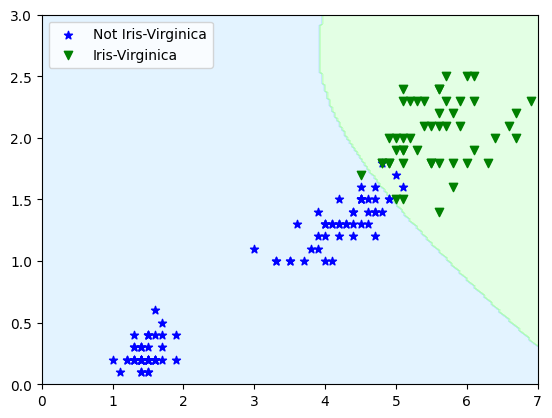

In [57]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_false = X[y==0]
X_true = X[y==1]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_false[:,0], X_false[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_true[:,0], X_true[:,1], marker="v", c="green", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()

As you may guess, the model does not have the same confidence in the prediction across all data points. The likelihood of one class is closer to the likelihood of the other class in points closer to the borders between classes than it is in points that are in the middle of the known data points. In the following code, we will project the certainty of the model according to the likelihood in a plot that will resemble a heatmap, where the intensity will be higher in points of highest likelihood.  

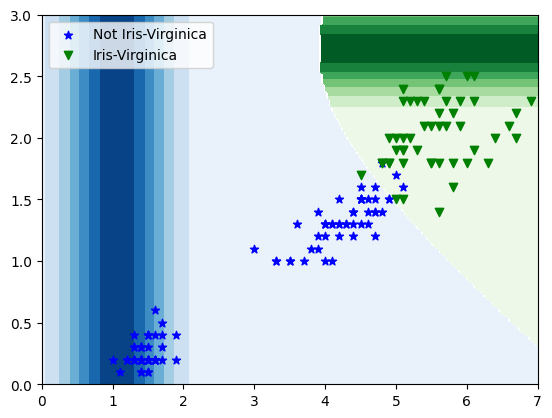

In [67]:
import matplotlib.pyplot as plt

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_false = X[y==0]
X_true = X[y==1]

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, np.where(predictions == 0, max_posteriors, np.nan), cmap="Blues")
plt.contourf(xx, yy, np.where(predictions == 1, max_posteriors, np.nan), cmap="Greens")
plt.scatter(X_false[:,0], X_false[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_true[:,0], X_true[:,1], marker="v", c="green", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()

As you can see, the further away the points are from the border, the stronger is the prediction in one class. In a large portion closer to the border, the differences are still significant enough to distinguish, but significantly lower than the further points. For this reason, the heatmap is not sensible enough to show the differences. Now let's visualize what happens with both plots when we consider more than two possible labels.

In [89]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris() 

X = iris["data"][:, 2:]
X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data

y = (iris["target"]).astype(int)

means, stds = np.zeros((X.shape[1], len(np.unique(y)))), np.zeros((X.shape[1], len(np.unique(y))))

for feature_num in range(X.shape[1]):
    for class_index in np.unique(y):
        tmp_x = X[:,feature_num][y==class_index]
        means[feature_num][class_index] = np.mean(tmp_x)
        stds[feature_num][class_index] = np.std(tmp_x)

print("Means:")
print(means)
print("Standard Deviations:")
print(stds)

Means:
[[1.462 4.26  5.552]
 [0.246 1.326 2.026]]
Standard Deviations:
[[0.17191859 0.46518813 0.54634787]
 [0.10432641 0.19576517 0.27188968]]


In [90]:
prob_y = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    prob_y[y_value] = (len(X[y==y_value]) / len(X))
    print(f"Probability of Class {y_value}: {prob_y[y_value]:.2f}")

Probability of Class 0: 0.33
Probability of Class 1: 0.33
Probability of Class 2: 0.33


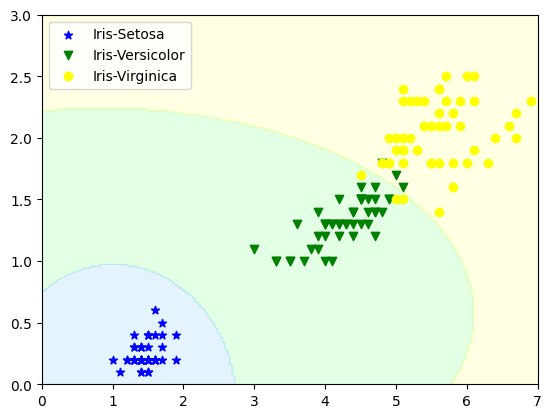

In [95]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point.reshape(-1,1) - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()

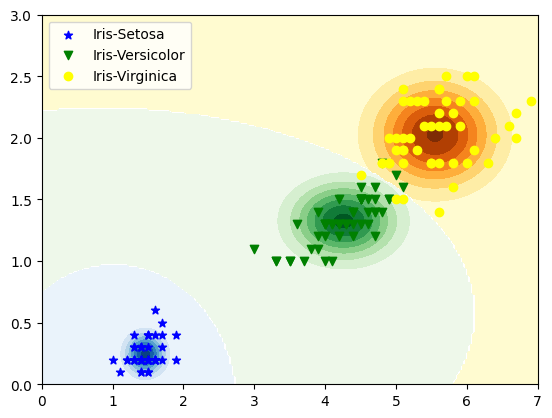

In [99]:
import matplotlib.pyplot as plt

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point.reshape(-1,1) - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, np.where(predictions == 0, max_posteriors, np.nan), cmap="Blues")
plt.contourf(xx, yy, np.where(predictions == 1, max_posteriors, np.nan), cmap="Greens")
plt.contourf(xx, yy, np.where(predictions == 2, max_posteriors, np.nan), cmap="YlOrBr")
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()

We have seen that for continous variables, the likelihood of a data point is assumed to follow a Normal Distribution, but this raises the issue of when the data we have access is not continuous. In the case of non-continuous data, discrete and binary data, it is assumed in the Naïve-Bayes another distribution: for discrete data the Multinomial Distribution is assumed, while for binary data it is a Bernoulli Distribution.

### Multinomial Naïve-Bayes <a id="multinomial-naive-bayes"></a>

To use the Iris dataset in a Multinomial Naïve-Bayes approach, it is required to perform binning. Binning consists in the mapping of continuous values into different bins. For example, when the length is above 5, we call it large. Meanwhile, when the lenght is below 2, we call it small. Between these two values, we call it medium. A similar division can be performed regarding the petal width, where values below 0.7 are small, between 0.7 and 1.7 are medium, and above 1.7 are large. Please keep in mind this binning is purely arbitrarily and was made just to convert the continuous variables to discrete variables. In the code below, the loading and binning of the dataset is performed.  

In [27]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, 2:]
X_0 = X[:, 0] # petal length
X_1 = X[:, 1] # petal width

X_0 = np.digitize(X_0, bins=[0, 2.0, 5.0])
X_1 = np.digitize(X_1, bins=[0, 0.7, 1.7])

X[:, 0] = X_0
X[:, 1] = X_1

y = iris["target"]

Now, let's plot the data to better visualize how it looks like after binning:

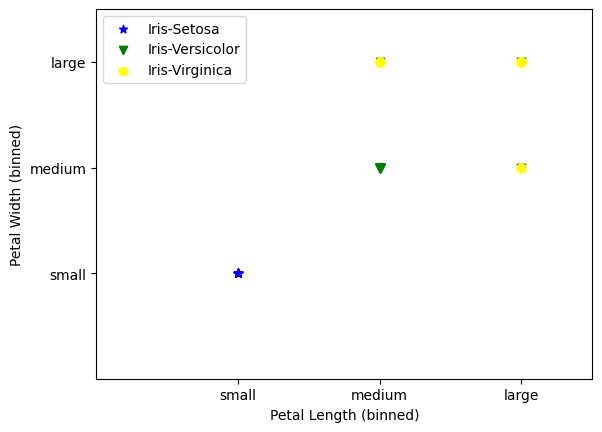

In [30]:
import matplotlib.pyplot as plt

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

plt.axis([0, 3.5, 0, 3.5])

plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xticks([1, 2, 3], ["small", "medium", "large"])
plt.yticks([1, 2, 3], ["small", "medium", "large"])
plt.xlabel("Petal Length (binned)")
plt.ylabel("Petal Width (binned)")
plt.legend(loc=2)
plt.show()

It becomes evident in this plot that the multinomial approach is not the best solution for the present dataset, at least with the selected boundaries. Because of those boundaries, there exists some overlay between classes in some of the selected conditions. Nevertheless, to expose the reader to some more context, we shall progress with the implementation of this model.

The Gaussian Naïve-Bayes works based on the assumption that not only the features are independent between each other, but also that they follow a Gaussian (Normal distribution). In Multinomial Naïve-Bayes, the same independence is assumed, but the distribution can no longer be Gaussian, as the variables are not continuous. In this case, the assumption is that the features follow a multinomial distribution, which is an extension of the binomial distribution. The multinomial distribution can be described as follows, starting by the Naïve assumption made previously, for $n$ features:

$$
P(y|x) = \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) \propto P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)\\
$$

Since we only have two features, we can simplify to:

$$
P(y|x) = \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1}, x_{2}) \propto P(x_{1}|y) \times P(x_{2}|y) \times P(y)\\
$$

From this, we calculate the probability of $y$ (prior probability) belonging to $c$ as follows, where $d$ is the number of features, $n$ is the number of data points, $1$ is the indicator function that returns 1 when $y_{i}=c$ is true, and 0 otherwise:

$$
P(y=c) = \frac{\sum_{i=1}^{d}1[y_{i}=c]}{n}
$$

To calculate the likelihood of features is where the multinomial distribution comes in, for a given point $x = (x_{1}=v, x_{2}=s)$ and considering $1$ as the indicator function which returns 1 when true and 0 when false:

$$
P(x|y=c) = P(x_{1}=v|y=c) \times P(x_{2}=s|y=c) = \frac{1(x_{1}=v) \times 1(y=c)}{1(y=c)} \times \frac{1(x_{2}=s) \times 1(y=c)}{1(y=c)}
$$

You might also want to include smoothing values to prevent division by zero. An example with Laplace smoothing, where $\alpha$ os a small value and $K_{j}$ is the number of possible values for feature $j$ can be written as shown:

$$
P(x|y=c) = \frac{1(x_{1}=v) \times 1(y=c) + \alpha}{1(y=c) + \alpha \cdot K_{j=1}} \times \frac{1(x_{2}=s) \times 1(y=c) + \alpha}{1(y=c) + \alpha \cdot K_{j=2}}
$$

Keep in mind this is applied in categorical Multinomial Naïve-Bayes and a different expression would be used in counted Multinomial Naïve-Bayes, for example in word counting, as it would also contain a term that considers the possible permutation counts. Nevertheless, this term can also be disregarded as it is common to all classes and useless when predicting the target class. 





### Bernoulli Naïve-Bayes <a id="bernoulli-naive-bayes"></a>

## Decision Tree <a id="decision-tree"></a>

## Random Forest <a id="random-forest"></a>

## Support Vector Machine (SVM) <a id="support-vector-machine"></a>

## K-Nearest Neighbours (KNN) <a id="k-nearest-neighbours"></a>